## **Setting Up Pandas in Your Environment**

**1. Python installation    
2. pip**

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### **Verify installation**

In [5]:
import pandas as pd
print(pd.__version__)

2.0.3


### **Creating a Series**

In [4]:
import pandas as pd
s = pd.Series([10, 20, 30, 40])
print(s)

0    10
1    20
2    30
3    40
dtype: int64


In [ ]:
import pandas as pd
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(s)

a    10
b    20
c    30
d    40
dtype: int64


In [ ]:
data = [10, 20, 30]
labels = ['b', 'c', 'a']
series = pd.Series(data, index=labels)
print(series)

a    30
b    10
c    20
dtype: int64


In [ ]:
series = series.sort_index()
print(series)

a    30
b    10
c    20
dtype: int64


In [147]:
series = series.sort_values()
print(series)


b    10
c    20
a    30
dtype: int64


### **Creating a DataFrame**

In [16]:
import pandas as pd
data = {
            'Name': ['Alice', 'Bob', 'Charlie'], 
            'Age': [25, 30, 35],
            'Salary': [50000, 60000, 70000]
        }
df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [6]:
import pandas as pd
data = pd.DataFrame({
            'Name': ['Alice', 'Bob', 'Charlie'], 
            'Age': [25, 30, 35],
            'Salary': [50000, 60000, 70000]
        })
print(data)


      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [18]:
df1 = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [100, 200, 300]
}, index=['x', 'y', 'z'])
print(df1)

    A    B
x  10  100
y  20  200
z  30  300


In [151]:
df1.head()

,Name,Age
0,Alice,25
1,Bob,30


In [152]:
df1.head(1)

,Name,Age
0,Alice,25


In [ ]:
df1.tail()

,Name,Age
0,Alice,25
1,Bob,30


In [154]:
df.shape

(5, 3)

In [155]:
df1.columns.tolist()

['Name', 'Age']

In [156]:
df1.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
df1.dtypes

Name    object
Age      int64
dtype: object

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    2 non-null      object
 1   Age     2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [160]:
df1.describe()

,Age
count,2.000000
mean,27.500000
std,3.535534
min,25.000000
25%,26.250000
50%,27.500000
75%,28.750000
max,30.000000


In [ ]:
df1.sample(2)

,Name,Age
1,Bob,30
0,Alice,25


In [162]:
df1.to_string()

'    Name  Age\n0  Alice   25\n1    Bob   30'

## **Data Selection & Indexing?**

### **Selecting Columns**


##### **Single column (Series)**

In [8]:
data['Age']

0    25
1    30
2    35
Name: Age, dtype: int64

In [9]:
data['Salary']

0    50000
1    60000
2    70000
Name: Salary, dtype: int64

##### **Multiple columns (DataFrame)**

In [11]:
data

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000


In [10]:
data[['Name', 'Age']]

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [12]:
data[['Name', 'Salary']]

,Name,Salary
0,Alice,50000
1,Bob,60000
2,Charlie,70000


### **Selecting Rows**

##### **label-based**

In [ ]:
data.loc[0]           # First row by index label 

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object

In [15]:
data.loc[0:1]         # Rows 0 to 2 inclusive

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000


In [19]:
df1

,A,B
x,10,100
y,20,200
z,30,300


In [22]:
# Select rows 'x' to 'z' (inclusive)
rows_x_to_z = df1.loc['x':'y'] 
print(rows_x_to_z)

    A    B
x  10  100
y  20  200


In [28]:
# Select column 'A' (label-based)
col_a = df1.loc[:, 'B'] 
print(col_a)

x    100
y    200
z    300
Name: B, dtype: int64


##### **integer position-based**

In [17]:
df.iloc[0]          # First row by position

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object

In [13]:
df.iloc[0:2]        # Rows 0 and 1

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000


In [24]:
df1

,A,B
x,10,100
y,20,200
z,30,300


In [30]:
# Select first row (position 0)
first_row = df1.iloc[0]
print(first_row)

A     10
B    100
Name: x, dtype: int64


In [34]:
# Select rows 0 to 1 (excludes 2)
rows_0_to_1 = df1.iloc[0:2]
print(rows_0_to_1)

    A    B
x  10  100
y  20  200


In [35]:
# Select column 1 (position 1 = 'B')
col_b = df1.iloc[:, 1] 
print(col_b)

x    100
y    200
z    300
Name: B, dtype: int64


##### **Setting Values**
 

In [38]:
df.loc[1, 'Salary'] = 65000

In [39]:
df.loc[1]

Name        Bob
Age          30
Salary    65000
Name: 1, dtype: object

##### **Aditional Selection**


In [17]:
df[df['Age'] > 25]  # Rows where Age > 25

,Name,Age,Salary
1,Bob,30,65000
2,Charlie,35,70000


## **Handling Missing Data**

#### **Detecting Missing Data**

In [23]:
missing_data = {
    'A': [1, 2, None, 4],
    'B': [None, 5, 6, 7],
    'C': [8, 9, 10, None]
}
missing_data = pd.DataFrame(missing_data)

In [44]:
missing_data = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 5, 6, 7],
    'C': [8, None, 10, None]
})
missing_data

,A,B,C
0,1.0,NaN,8.0
1,2.0,5.0,NaN
2,NaN,6.0,10.0
3,4.0,7.0,NaN


In [45]:
missing_data.isnull()          # Returns DataFrame of True/False for missing 

,A,B,C
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,True


In [46]:
missing_data.isnull().sum()    # Count missing values per column

A    1
B    1
C    2
dtype: int64

### **Changing Data Types**

In [47]:
df['Age']

0    25
1    30
2    35
Name: Age, dtype: int64

In [48]:
df['Age'] = df['Age'].astype(float)  # Convert Age to float
print(df.dtypes)

Name       object
Age       float64
Salary      int64
dtype: object


In [49]:
df['Age']

0    25.0
1    30.0
2    35.0
Name: Age, dtype: float64

### **Removing Duplicates**

In [50]:
df_with_duplicates = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie'], 
    'Age': [25, 30, 25, 35],
    'Salary': [50000, 60000, 50000, 70000]
}) 
print(df_with_duplicates)  

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2    Alice   25   50000
3  Charlie   35   70000


In [51]:
print(df_with_duplicates.duplicated())  # Check for duplicates

0    False
1    False
2     True
3    False
dtype: bool


In [52]:
print(df_with_duplicates.drop_duplicates())  # Remove duplicates

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
3  Charlie   35   70000


## **Data Aggregation & Grouping**

In [53]:
df

,Name,Age,Salary
0,Alice,25.0,50000
1,Bob,30.0,65000
2,Charlie,35.0,70000


In [54]:
# sum of a column
print(df['Salary'].sum())

185000


In [55]:
# mean of a column
print(df['Age'].mean())

30.0


In [56]:
# count of non-null values in a column
print(df['Salary'].count())

3


In [57]:
# minimum value in a column
print(df['Age'].min())

25.0


In [58]:
# maximum value in a column
print(df['Salary'].max())

70000


In [1]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [20, 21, 20, 21],
    'Score': [85, 90, 75, 95]
}

df = pd.DataFrame(data)

grouped = df.groupby('Age').sum()
print(grouped)

             Name  Score
Age                     
20   AliceCharlie    160
21       BobDavid    185


In [2]:
grouped

,Name,Score
Age,,
20,AliceCharlie,160
21,BobDavid,185


In [61]:
# group Saalary mean by Age
grouped_salary_mean = df.groupby('Age')['Salary'].mean()

In [62]:
grouped_salary_mean

Age
25.0    50000.0
30.0    65000.0
35.0    70000.0
Name: Salary, dtype: float64

In [82]:
# group Saalary mean by Age
grouped_age_mean = df.groupby('Salary')['Age'].mean()   
grouped_age_mean

Salary
50000    25.0
65000    30.0
70000    35.0
Name: Age, dtype: float64

In [83]:
groupby1 = pd.DataFrame([
    {'Name': 'Alice', 'Age': 25, 'Salary': 50000},
    {'Name': 'Bob', 'Age': 30, 'Salary': 60000},
    {'Name': 'Charlie', 'Age': 35, 'Salary': 75000},
    {'Name': 'Charlie', 'Age': 35, 'Salary': 70000}
])

In [84]:
groupby1

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,75000
3,Charlie,35,70000


In [85]:
# group Saalary mean by Age
grouped_salary_mean = groupby1.groupby('Age')['Salary'].mean()
grouped_salary_mean

Age
25    50000.0
30    60000.0
35    72500.0
Name: Salary, dtype: float64

In [86]:
# Multiple Aggregations
aggregated = df.groupby('Age').agg({
    'Salary': ['mean', 'sum'],
    'Name': 'count'
})

In [71]:
aggregated

Salary         Name
         mean    sum count
Age                       
25.0  50000.0  50000     1
30.0  65000.0  65000     1
35.0  70000.0  70000     1

### **Concatenation**

- Concatenation in pandas refers to combining two or more DataFrames or Series along a particular axis (row-wise or column-wise).     
- It is useful when you have datasets with the same columns (to stack vertically) or the same index (to stack horizontally).
- Use concatenation when you want to append data, merge results from different sources, or combine similar datasets for further analysis.

In [3]:
# Dataframes for Concatenation
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob'], 
    'Age': [25, 30],
    'Salary': [50000, 60000]
})
df2 = pd.DataFrame({
    'Name': ['Charlie', 'David'], 
    'Age': [35, 40],
    'Salary': [70000, 80000]
})

In [4]:
df1

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000


In [5]:
df2

,Name,Age,Salary
0,Charlie,35,70000
1,David,40,80000


In [ ]:
# cancat DataFrames vertically (row base)
df_concat = pd.concat([df1, df2], ignore_index=True)

In [7]:
df_concat

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,40,80000


In [ ]:
# cancat DataFrames horizontally (col based)
df_concat_horizontal = pd.concat([df1, df2], axis=1)

In [98]:
df_concat_horizontal

,Name,Age,Salary,Name,Age,Salary
0,Alice,25,50000,Charlie,35,70000
1,Bob,30,60000,David,40,80000


### **MERGE**

- `Merge` in pandas is used to combine two DataFrames based on one or more common columns (keys), similar to SQL joins.
- It is useful when you need to bring together related information from different tables, such as combining user details with their transactions.
- Use merge when your datasets share a common column and you want to perform operations like inner, outer, left, or right joins to control how rows are matched and included in the result.

In [107]:
# Merging DataFrames
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob'], 
    'Age': [25, 30]
})
df1


,Name,Age
0,Alice,25
1,Bob,30


In [108]:
df2 = pd.DataFrame({
    'Name': ['Alice', 'Charlie'], 
    'Salary': [50000, 70000]
})
df2

,Name,Salary
0,Alice,50000
1,Charlie,70000


In [109]:
df_merged = pd.merge(df1, df2, on='Name')
print(df_merged)

    Name  Age  Salary
0  Alice   25   50000


In [8]:
import pandas as pd

df1 = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]})
df2 = pd.DataFrame({'Name': ['Bob', 'Charlie', 'David'], 'Score': [85, 90, 95]})

df_merged = pd.merge(df1, df2, on='Name')
print(df_merged)

      Name  Age  Score
0      Bob   30     85
1  Charlie   35     90


In [9]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'Name': ['Bob', 'Charlie', 'David'],
    'Score': [85, 90, 95]
})

df_merged = pd.merge(df1, df2, on='Name', how='inner')
print(df_merged)

      Name  Age  Score
0      Bob   30     85
1  Charlie   35     90


In [10]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'Name': ['Bob', 'Charlie', 'David'],
    'Score': [85, 90, 95]
})

df_merged = pd.merge(df1, df2, on='Name', how='outer')
print(df_merged)

      Name   Age  Score
0    Alice  25.0    NaN
1      Bob  30.0   85.0
2  Charlie  35.0   90.0
3    David   NaN   95.0


In [11]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'Name': ['Bob', 'Charlie', 'David'],
    'Score': [85, 90, 95]
})

df_merged = pd.merge(df1, df2, on='Name', how='right')
print(df_merged)


      Name   Age  Score
0      Bob  30.0     85
1  Charlie  35.0     90
2    David   NaN     95


### **Join**

- `join` in pandas is a method used to combine two DataFrames based on their indexes (row labels), rather than columns.
- It is useful when you want to add columns from another DataFrame whose index matches the index of the original DataFrame.
- Use `join` when your datasets are aligned by index, or when you want to combine data without specifying a common column key.

In [12]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

df2 = pd.DataFrame({
    'Score': [85, 90, 95]
})

df_joined = df1.join(df2, how='outer')
print(df_joined)


      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     95


In [13]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=[0, 1, 2])

df2 = pd.DataFrame({
    'Score': [85, 90],
    'Grade': ['A', 'B']
}, index=[0, 1])

df_joined = df1.join(df2, how='inner')
print(df_joined)


    Name  Age  Score Grade
0  Alice   25     85     A
1    Bob   30     90     B


In [14]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=[0, 1, 2])

df2 = pd.DataFrame({
    'Score': [85, 90],
    'Grade': ['A', 'B']
}, index=[0, 1])

df_joined = df1.join(df2, how='left')
print(df_joined)


      Name  Age  Score Grade
0    Alice   25   85.0     A
1      Bob   30   90.0     B
2  Charlie   35    NaN   NaN


In [15]:
import pandas as pd

df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}, index=[0, 1, 2])

df2 = pd.DataFrame({
    'Score': [85, 90, 95],
    'Grade': ['A', 'B', 'C']
}, index=[1, 2, 3])

df_joined = df1.join(df2, how='right')
print(df_joined)


      Name   Age  Score Grade
1      Bob  30.0     85     A
2  Charlie  35.0     90     B
3      NaN   NaN     95     C


### **Time Series Data**  

In [16]:
# Generate a range of dates from Jan 1 to Jan 10, 2023
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

# Create a DataFrame from the date range
ts_df = pd.DataFrame(date_rng, columns=['date'])

# Print the DataFrame
print(ts_df)

        date
0 2023-01-01
1 2023-01-02
2 2023-01-03
3 2023-01-04
4 2023-01-05
5 2023-01-06
6 2023-01-07
7 2023-01-08
8 2023-01-09
9 2023-01-10


In [110]:
import pandas as pd

# Sample data with dates as strings
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'Value': [10, 20, 30]
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

        Date  Value
0 2023-01-01     10
1 2023-01-02     20
2 2023-01-03     30


### **Time-Base Selection** 

In [17]:
import pandas as pd
import numpy as np

# Create a date range and set it as index
date_rng = pd.date_range(start='2023-01-01', end='2023-02-10', freq='D')
df = pd.DataFrame(np.random.randn(len(date_rng)), index=date_rng, columns=['value'])

# Now filter only January 2023 data
january_data = df.loc['2023-01-01':'2023-01-31']
print(january_data)

               value
2023-01-01  0.541407
2023-01-02 -0.313185
2023-01-03  1.870036
2023-01-04  1.865204
2023-01-05  1.661841
2023-01-06 -2.588540
2023-01-07 -1.119609
2023-01-08 -0.168309
2023-01-09 -1.689595
2023-01-10 -0.269980
2023-01-11  0.301084
2023-01-12  1.896932
2023-01-13  1.239651
2023-01-14 -1.828078
2023-01-15 -0.151891
2023-01-16 -0.549251
2023-01-17 -1.829630
2023-01-18  1.997056
2023-01-19  1.242681
2023-01-20  0.278392
2023-01-21  0.380325
2023-01-22  1.200556
2023-01-23  0.167580
2023-01-24  0.532970
2023-01-25 -0.893847
2023-01-26 -1.313818
2023-01-27 -0.299679
2023-01-28 -0.854986
2023-01-29  0.940018
2023-01-30  0.221383
2023-01-31 -0.510080


### **Shifting Data**

In [18]:
import pandas as pd

data = {'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

df['PrevDay'] = df['Value'].shift(1)
print(df)

   Value  PrevDay
0     10      NaN
1     20     10.0
2     30     20.0
3     40     30.0


## **Handling Text Data** 

In [121]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
}
df = pd.DataFrame(data)

print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    David   40


#### **Convert all names to lowercase**

In [127]:
ab = df['Name'].str.lower()        

In [128]:
ab

0      alice
1        bob
2    charlie
3      david
Name: Name, dtype: object

#### **Check if 'a' in string**

In [129]:
df['Name'].str.contains('b')  # Returns True if 'a' is in the name, else False

0    False
1     True
2    False
3    False
Name: Name, dtype: bool

#### **Extracting the first letter of each name**

In [130]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)


      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
3    David   40


In [131]:
# Extracting the first letter of each name
df['Initial'] = df['Name'].str[0]
print(df)

      Name  Age Initial
0    Alice   25       A
1      Bob   30       B
2  Charlie   35       C
3    David   40       D


#### **Split the 'Name' column by space**

In [132]:
import pandas as pd

data = {
    'Name': ['Alice Smith', 'Bob Lee', 'Charlie Brown', 'David Miller'],
    'Age': [25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)

            Name  Age
0    Alice Smith   25
1        Bob Lee   30
2  Charlie Brown   35
3   David Miller   40


In [133]:
# Split the 'Name' column by space
df['Name_Split'] = df['Name'].str.split(' ')
print(df)

            Name  Age        Name_Split
0    Alice Smith   25    [Alice, Smith]
1        Bob Lee   30        [Bob, Lee]
2  Charlie Brown   35  [Charlie, Brown]
3   David Miller   40   [David, Miller]


In [134]:
import pandas as pd

data = {
    'Name': ['Alice.Smith', 'Bob.Lee', 'Charlie.Brown', 'David.Miller'],
    'Age': [25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)

            Name  Age
0    Alice.Smith   25
1        Bob.Lee   30
2  Charlie.Brown   35
3   David.Miller   40


In [135]:
# Split the 'Name' column by space
df['Name_Split'] = df['Name'].str.split('.')
print(df)

            Name  Age        Name_Split
0    Alice.Smith   25    [Alice, Smith]
1        Bob.Lee   30        [Bob, Lee]
2  Charlie.Brown   35  [Charlie, Brown]
3   David.Miller   40   [David, Miller]


#### **Replace 'Alice' with 'Alicia' in the 'Name' column**

In [136]:
import pandas as pd

data = {
    'Name': ['Alice Smith', 'Bob Lee', 'Charlie Brown', 'David Miller'],
    'Age': [25, 30, 35, 40]
}
df = pd.DataFrame(data)
print(df)

            Name  Age
0    Alice Smith   25
1        Bob Lee   30
2  Charlie Brown   35
3   David Miller   40


In [137]:
# Replace 'Alice' with 'Alicia' in the 'Name' column
df['Name'] = df['Name'].str.replace('Alice', 'Alicia')
print(df)

            Name  Age
0   Alicia Smith   25
1        Bob Lee   30
2  Charlie Brown   35
3   David Miller   40


### **Pivot Tables & Crosstabs** 

#### **Create a pivot table: mean income by AgeGroup and Gender**

In [138]:
import pandas as pd

# Sample DataFrame for pivot table
data = {
    'AgeGroup': ['20-29', '20-29', '30-39', '30-39', '20-29'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'Income': [40000, 42000, 50000, 52000, 43000]
}
df = pd.DataFrame(data)
print(df)


  AgeGroup  Gender  Income
0    20-29    Male   40000
1    20-29  Female   42000
2    30-39    Male   50000
3    30-39  Female   52000
4    20-29  Female   43000


In [139]:
# Create a pivot table: mean income by AgeGroup and Gender
pivot = pd.pivot_table(df, values='Income', index='AgeGroup', columns='Gender', aggfunc='mean')
print(pivot)

Gender    Female   Male
AgeGroup               
20-29      42500  40000
30-39      52000  50000


#### **Compute frequency table (crosstab) of AgeGroup vs Gender**

In [140]:
import pandas as pd

# Sample DataFrame for crosstab
data = {
    'AgeGroup': ['20-29', '20-29', '30-39', '30-39', '20-29'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'Income': [40000, 42000, 50000, 52000, 43000]
}
df = pd.DataFrame(data)
print(df)


  AgeGroup  Gender  Income
0    20-29    Male   40000
1    20-29  Female   42000
2    30-39    Male   50000
3    30-39  Female   52000
4    20-29  Female   43000


In [141]:
# Compute frequency table (crosstab) of AgeGroup vs Gender
crosstab = pd.crosstab(df['AgeGroup'], df['Gender'])
print(crosstab)

Gender    Female  Male
AgeGroup              
20-29          2     1
30-39          1     1


### **Creating CSV File**

In [143]:
import pandas as pd
import numpy as np

# Create a DataFrame with various data types and features
data = {
    'Name': ['Alice Smith', 'Bob Lee', 'Charlie Brown', 'David Miller', 'Alice Smith', None],
    'Age': [25, 30, 35, 40, 25, np.nan],
    'Salary': [50000, 60000, 70000, 80000, 50000, 90000],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Female'],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-15', '2023-02-01', '2023-01-01', '2023-03-01'],
    'Department': ['HR', 'IT', 'IT', 'Finance', 'HR', 'Finance'],
    'Has_Passed': [True, False, True, True, True, False],
    'Score': [88.5, 92.0, np.nan, 85.0, 88.5, 79.0]
}

df = pd.DataFrame(data)
df

,Name,Age,Salary,Gender,Date,Department,Has_Passed,Score
0,Alice Smith,25.0,50000,Female,2023-01-01,HR,True,88.5
1,Bob Lee,30.0,60000,Male,2023-01-02,IT,False,92.0
2,Charlie Brown,35.0,70000,Male,2023-01-15,IT,True,NaN
3,David Miller,40.0,80000,Male,2023-02-01,Finance,True,85.0
4,Alice Smith,25.0,50000,Female,2023-01-01,HR,True,88.5
5,None,NaN,90000,Female,2023-03-01,Finance,False,79.0


In [146]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

            Name   Age  Salary  Gender       Date Department  Has_Passed  \
0    Alice Smith  25.0   50000  Female 2023-01-01         HR        True   
1        Bob Lee  30.0   60000    Male 2023-01-02         IT       False   
2  Charlie Brown  35.0   70000    Male 2023-01-15         IT        True   
3   David Miller  40.0   80000    Male 2023-02-01    Finance        True   
4    Alice Smith  25.0   50000  Female 2023-01-01         HR        True   
5           None   NaN   90000  Female 2023-03-01    Finance       False   

   Score  
0   88.5  
1   92.0  
2    NaN  
3   85.0  
4   88.5  
5   79.0  


In [163]:
# Save to CSV
# df.to_csv('test_data.csv', index=False)

In [162]:
# df.to_excel('output.xlsx', index=False)

### **Reading**

In [159]:
# df = pd.read_csv('test_data.csv')
# print(df.head)

In [161]:
# df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

In [ ]:
# df = pd.read_json('data.json')

#### **Convert 'Gender' column to category type**

In [172]:
import pandas as pd

# Sample DataFrame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'AgeGroup': ['20-29', '20-29', '30-39', '30-39', '20-29', '40-49'],
    'Income': [40000, 42000, 50000, 52000, 43000, 60000]
}
df = pd.DataFrame(data)
print(df)

   Gender AgeGroup  Income
0    Male    20-29   40000
1  Female    20-29   42000
2    Male    30-39   50000
3  Female    30-39   52000
4  Female    20-29   43000
5    Male    40-49   60000


In [173]:
# Convert 'Gender' column to category type
df['Gender'] = df['Gender'].astype('category')
print(df.dtypes)

Gender      category
AgeGroup      object
Income         int64
dtype: object


In [175]:
# Categories and Codes for the 'Gender' column
print(df['Gender'].cat.categories)
print(df['Gender'].cat.codes)

Index(['Female', 'Male'], dtype='object')
0    1
1    0
2    1
3    0
4    0
5    1
dtype: int8


#### **convert 'Income' to thousands and create a new column 'Income_K'**

In [179]:
# Apply a function to convert 'Income' to thousands and create a new column 'Income_K'
df['Income_K'] = df['Income'].apply(lambda x: x / 1000)
print(df)

   Gender AgeGroup  Income  Income_K
0    Male    20-29   40000      40.0
1  Female    20-29   42000      42.0
2    Male    30-39   50000      50.0
3  Female    30-39   52000      52.0
4  Female    20-29   43000      43.0
5    Male    40-49   60000      60.0


#### **.map() to create a new column 'AgeGroup' based on 'Age'**

In [185]:
import pandas as pd

# Sample DataFrame
data = {
    'Age': [15, 22, 17, 35, 12, 28]
}
df = pd.DataFrame(data)
print(df)

   Age
0   15
1   22
2   17
3   35
4   12
5   28


In [186]:
# Using .map() to create a new column 'AgeGroup' based on 'Age'
df['AgeGroup'] = df['Age'].map(lambda x: 'Adult' if x >= 18 else 'Minor')
print(df)

   Age AgeGroup
0   15    Minor
1   22    Adult
2   17    Minor
3   35    Adult
4   12    Minor
5   28    Adult


### **Use .query() for fast filtering**

In [193]:
# Example DataFrame
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Age': [25, 35, 40, 28, 25, 35],
    'Income': [48000, 60000, 70000, 52000, 30000, 60000]
}
df = pd.DataFrame(data)
print(df)

      Name  Age  Income
0    Alice   25   48000
1      Bob   35   60000
2  Charlie   40   70000
3    David   28   52000
4      Eve   25   30000
5    Frank   35   60000


In [194]:
# Use .query() for fast filtering
result = df.query('Age > 30 & Income > 50000')
print(result)

      Name  Age  Income
1      Bob   35   60000
2  Charlie   40   70000
5    Frank   35   60000


### **Histogram**

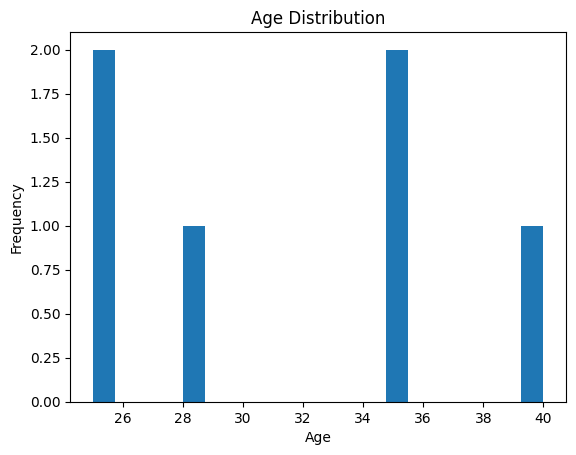

In [195]:
# Basic Plotting: Histogram of Age
import matplotlib.pyplot as plt

df['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### **line plot**

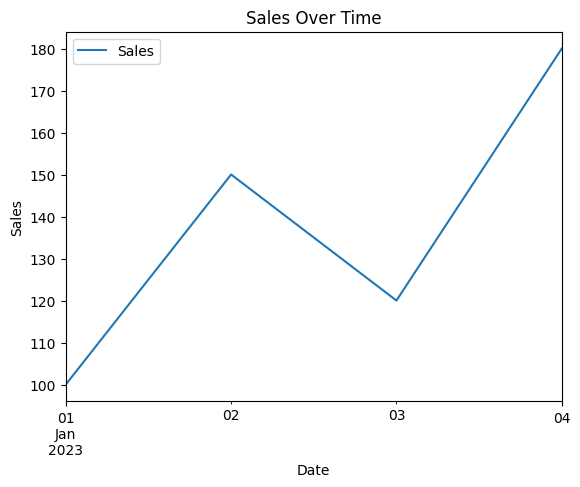

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for line plot
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Sales': [100, 150, 120, 180]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Line Plot
df.plot(x='Date', y='Sales', kind='line', title='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### **bar plot**

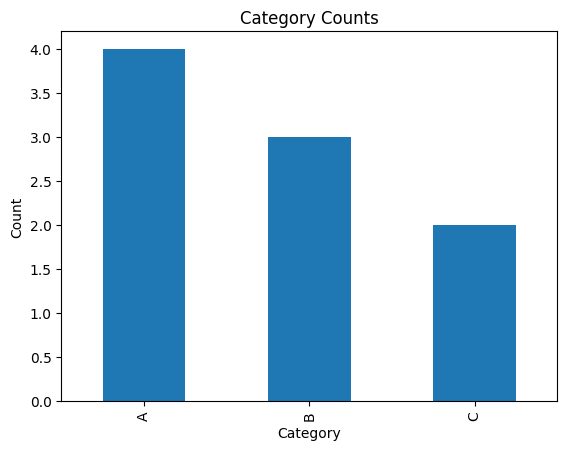

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for bar plot
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A']
}
df = pd.DataFrame(data)

# Bar Plot: Count of each category
df['Category'].value_counts().plot(kind='bar', title='Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### **scatter plot**

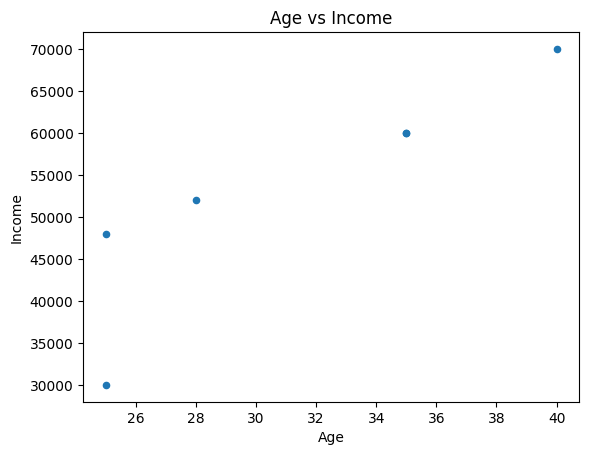

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for scatter plot
data = {
    'Age': [25, 35, 40, 28, 25, 35],
    'Income': [48000, 60000, 70000, 52000, 30000, 60000]
}
df = pd.DataFrame(data)

# Scatter Plot
df.plot.scatter(x='Age', y='Income', title='Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### **Boxplot using seaborn**

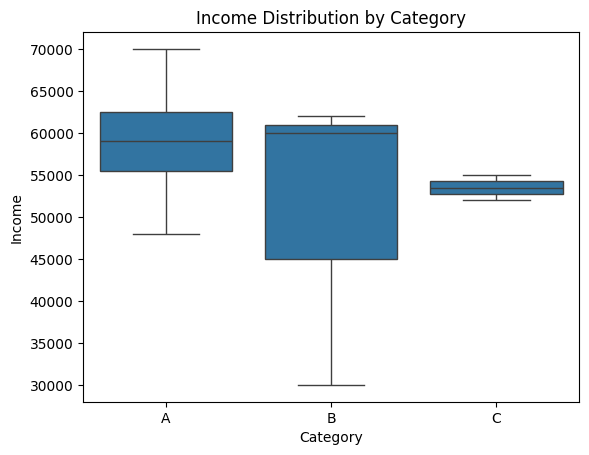

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A'],
    'Income': [48000, 60000, 70000, 52000, 30000, 60000, 55000, 62000, 58000]
}
df = pd.DataFrame(data)

# Boxplot using seaborn
sns.boxplot(x='Category', y='Income', data=df)
plt.title('Income Distribution by Category')
plt.show()